## Instagram Likes Prediction Model
## **TEAM D-TALE** 
**SYMBIOSIS INSTITUTE OF OPERATIONS MANAGEMENT, NASHIK**

In [138]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from lightgbm import LGBMClassifier
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.simplefilter('ignore')

In [139]:
train = pd.read_csv('C://Users//Anuvrat Shukla//Desktop//competitions//Analytics//Regression//ISB _Intagram posts//train.csv',encoding="ISO-8859-1", parse_dates=[10,11])
train.shape

(16539, 22)

In [140]:
train.head()

numberPosts                           Website  \
0           49  instagram.com/bestofstreetstyled   
1           49  instagram.com/bestofstreetstyled   
2           49  instagram.com/bestofstreetstyled   
3           49  instagram.com/bestofstreetstyled   
4           49  instagram.com/bestofstreetstyled   

                             urlProfile                       username  \
0  https://www.instagram.com/mensflair/  Men | Style | Class | Fashion   
1  https://www.instagram.com/mensflair/  Men | Style | Class | Fashion   
2  https://www.instagram.com/mensflair/  Men | Style | Class | Fashion   
3  https://www.instagram.com/mensflair/  Men | Style | Class | Fashion   
4  https://www.instagram.com/mensflair/  Men | Style | Class | Fashion   

   numberFollowing                                 descriptionProfile  \
0               10  Menswear & Lifestyle BE INSPIRED DAILY ____ Fo...   
1               10  Menswear & Lifestyle BE INSPIRED DAILY ____ Fo...   
2               10  Menswear & Lifestyle BE INSPIRED DAILY ____ Fo...   
3               10  Menswear & Lifestyle BE INSPIRED DAILY ____ Fo...   
4               10  Menswear & Lifestyle BE INSPIRED DAILY ____ Fo...   

       alias  numberFollowers  \
0  mensflair           124965   
1  mensflair           124965   
2  mensflair           124965   
3  mensflair           124965   
4  mensflair           124965   

                                       urlImgProfile  \
0  https://scontent.cdninstagram.com/t51.2885-19/...   
1  https://scontent.cdninstagram.com/t51.2885-19/...   
2  https://scontent.cdninstagram.com/t51.2885-19/...   
3  https://scontent.cdninstagram.com/t51.2885-19/...   
4  https://scontent.cdninstagram.com/t51.2885-19/...   

                                            filename  ...           mentions  \
0  18161447_1658356384474317_9111601070664056832_...  ...     ['@the_vasco']   
1  18298601_121409661745614_6986690297598050304_n...  ...  ['@johnnyedlind']   
2  18161743_412774429107168_768065153252982784_n.jpg  ...      ['@max_haim']   
3  18251869_290881328035320_2327183756814712832_n...  ...     ['@magic_fox']   
4  18160659_214392992395434_3720859060493352960_n...  ...      ['@bookonin']   

  multipleImage NoOfImages  isVideo  localization  \
0             0          1        0           NaN   
1             0          1        0           NaN   
2             0          1        0           NaN   
3             0          1        0           NaN   
4             0          1        0           NaN   

                                                tags numberLikes  \
0  ['#suit', '#suits', '#gentlemen', '#gentlemens...          17   
1                                                 []         304   
2                                                 []         438   
3  ['#suit', '#suits', '#gentlemen', '#gentlemens...         272   
4                                                 []         672   

                                                 url  Influencer Level  \
0  https://www.instagram.com/p/BTilZcThQq5/?taken...    Low Influencer   
1  https://www.instagram.com/p/BTiROoghcLV/?taken...    Low Influencer   
2  https://www.instagram.com/p/BTh66MZB7BP/?taken...    Low Influencer   
3  https://www.instagram.com/p/BThniHNlXhO/?taken...    Low Influencer   
4  https://www.instagram.com/p/BThRe9-BZh0/?taken...    Low Influencer   

                                         description  
0  Courtesy of @the_vasco\r\n____________________...  
1  Style by: @johnnyedlind\r\nWhatcha say ï¿½ï¿½ï...  
2  Stunning View - Tag Someone You Would Skydive ...  
3  Courtesy of @magic_fox\r\n____________________...  
4  Tag someone you would take - Santorini, Greece...  

[5 rows x 22 columns]

In [141]:
train.columns

Index(['numberPosts', 'Website', 'urlProfile', 'username', 'numberFollowing',
       'descriptionProfile', 'alias', 'numberFollowers', 'urlImgProfile',
       'filename', 'Date', 'urlImage', 'mentions', 'multipleImage',
       'NoOfImages', 'isVideo', 'localization', 'tags', 'numberLikes', 'url',
       'Influencer Level', 'description'],
      dtype='object')

**Removing URL features**

In [142]:
train=train.drop(['Website','urlProfile','urlImgProfile','urlImage','url'], axis = 1)

**Extracting Date Featurees**

In [143]:
for attr in ['year', 'month', 'day', 'week', 'dayofweek']:                                                                     # running loop for extracting new features from date
  train[attr] = getattr(train['Date'].dt, attr)

In [144]:
train.head(50)

numberPosts                       username  numberFollowing  \
0            49  Men | Style | Class | Fashion               10   
1            49  Men | Style | Class | Fashion               10   
2            49  Men | Style | Class | Fashion               10   
3            49  Men | Style | Class | Fashion               10   
4            49  Men | Style | Class | Fashion               10   
5            49  Men | Style | Class | Fashion               10   
6            49  Men | Style | Class | Fashion               10   
7            49  Men | Style | Class | Fashion               10   
8            49  Men | Style | Class | Fashion               10   
9            49  Men | Style | Class | Fashion               10   
10           49  Men | Style | Class | Fashion               10   
11           49  Men | Style | Class | Fashion               10   
12           49  Men | Style | Class | Fashion               10   
13           49  Men | Style | Class | Fashion               10   
14           49  Men | Style | Class | Fashion               10   
15           49  Men | Style | Class | Fashion               10   
16           49  Men | Style | Class | Fashion               10   
17         3573                  Filippo Fiora              574   
18         3573                  Filippo Fiora              574   
19         3573                  Filippo Fiora              574   
20         3573                  Filippo Fiora              574   
21         3573                  Filippo Fiora              574   
22         3573                  Filippo Fiora              574   
23         3573                  Filippo Fiora              574   
24         3573                  Filippo Fiora              574   
25         3573                  Filippo Fiora              574   
26         3573                  Filippo Fiora              574   
27         3573                  Filippo Fiora              574   
28         3573                  Filippo Fiora              574   
29         3573                  Filippo Fiora              574   
30         3573                  Filippo Fiora              574   
31         3573                  Filippo Fiora              574   
32         3573                  Filippo Fiora              574   
33         3573                  Filippo Fiora              574   
34         2249              Chunky Aka Monkey              314   
35         2249              Chunky Aka Monkey              314   
36         2249              Chunky Aka Monkey              314   
37         2249              Chunky Aka Monkey              314   
38         2249              Chunky Aka Monkey              314   
39         2249              Chunky Aka Monkey              314   
40         2249              Chunky Aka Monkey              314   
41         2249              Chunky Aka Monkey              314   
42         2249              Chunky Aka Monkey              314   
43         2249              Chunky Aka Monkey              314   
44         2249              Chunky Aka Monkey              314   
45         2249              Chunky Aka Monkey              314   
46         2249              Chunky Aka Monkey              314   
47         2249              Chunky Aka Monkey              314   
48         2249              Chunky Aka Monkey              314   
49         2249              Chunky Aka Monkey              314   

                                   descriptionProfile            alias  \
0   Menswear & Lifestyle BE INSPIRED DAILY ____ Fo...        mensflair   
1   Menswear & Lifestyle BE INSPIRED DAILY ____ Fo...        mensflair   
2   Menswear & Lifestyle BE INSPIRED DAILY ____ Fo...        mensflair   
3   Menswear & Lifestyle BE INSPIRED DAILY ____ Fo...        mensflair   
4   Menswear & Lifestyle BE INSPIRED DAILY ____ Fo...        mensflair   
5   Menswear & Lifestyle BE INSPIRED DAILY ____ Fo...        mensflair   
6   Menswear & Lifestyle BE INSPIRED DAILY ____ Fo...        mensfla

In [145]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16539 entries, 0 to 16538
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   numberPosts         16539 non-null  int64         
 1   username            16335 non-null  object        
 2   numberFollowing     16539 non-null  int64         
 3   descriptionProfile  16148 non-null  object        
 4   alias               16539 non-null  object        
 5   numberFollowers     16539 non-null  int64         
 6   filename            16539 non-null  object        
 7   Date                16539 non-null  datetime64[ns]
 8   mentions            16539 non-null  object        
 9   multipleImage       16539 non-null  int64         
 10  NoOfImages          16539 non-null  int64         
 11  isVideo             16539 non-null  int64         
 12  localization        6887 non-null   object        
 13  tags                16539 non-null  object    

In [146]:
train.nunique()

numberPosts             881
username                956
numberFollowing         631
descriptionProfile      939
alias                   973
numberFollowers         973
filename              16539
Date                    337
mentions               9412
multipleImage             2
NoOfImages               10
isVideo                   1
localization           3322
tags                   6469
numberLikes           12233
Influencer Level          4
description           15685
year                      5
month                    12
day                      31
week                     51
dayofweek                 7
dtype: int64

**Engagement Rate**

In [148]:
train['engagement_rate']=100* (train.numberLikes/train.numberFollowers)

# % NaN Values

In [149]:
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

localization          58.4
descriptionProfile     2.4
description            1.3
username               1.2
engagement_rate        0.0
multipleImage          0.0
numberFollowing        0.0
alias                  0.0
numberFollowers        0.0
filename               0.0
Date                   0.0
mentions               0.0
isVideo                0.0
NoOfImages             0.0
dayofweek              0.0
tags                   0.0
numberLikes            0.0
Influencer Level       0.0
year                   0.0
month                  0.0
day                    0.0
week                   0.0
numberPosts            0.0
dtype: float64

In [150]:
#train = train.drop(['localization'], axis=1)

Creating a seperate group **'Unknown'** for null Values

In [151]:
train[['descriptionProfile','description','username']] = train[['username','descriptionProfile','description']].fillna('unknown')

**Extracting Length of Textual features**

In [152]:
# Mentions
train['mentions_len'] = train['mentions'].apply(lambda x: len(x))
# Tags
train['tags_len'] = train['tags'].apply(lambda x: len(x))
# Description 
train['description_len'] = train['description'].apply(lambda x: len(x))
# Description Profile
train['description_profile_len'] = train['descriptionProfile'].apply(lambda x: len(x))

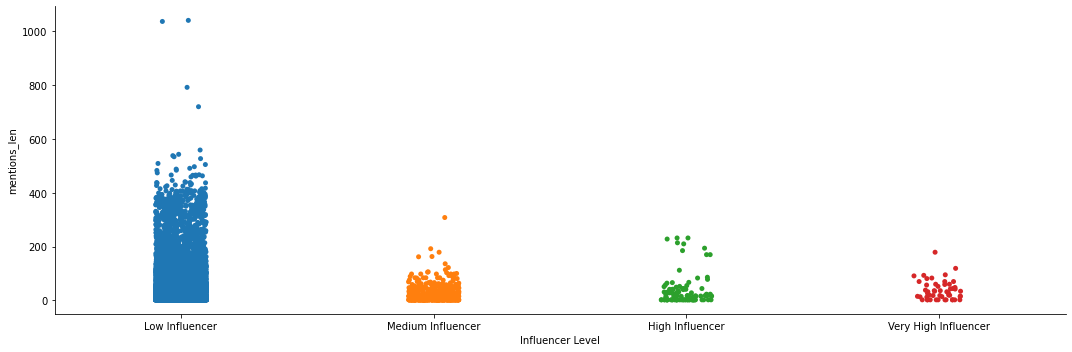

In [153]:
_ = sns.catplot(x="Influencer Level", y="mentions_len", data=train, height=5, aspect=24/8)

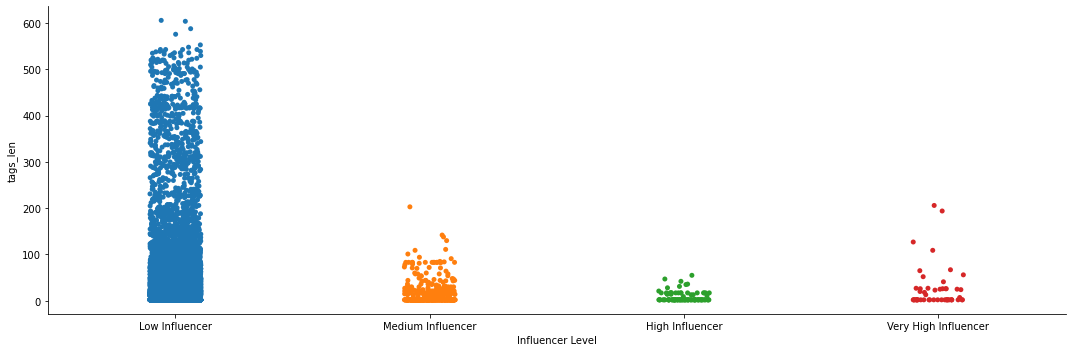

In [134]:
_ = sns.catplot(x="Influencer Level", y="tags_len", data=train, height=5, aspect=24/8)

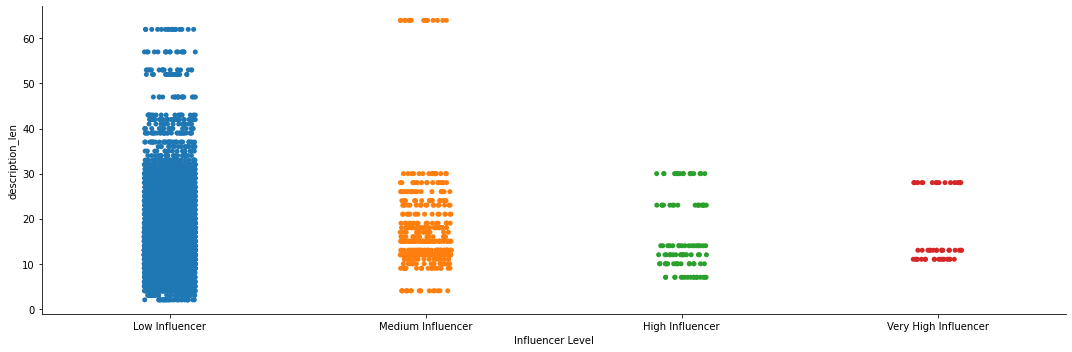

In [96]:
_ = sns.catplot(x="Influencer Level", y="description_len", data=train, height=5, aspect=24/8)

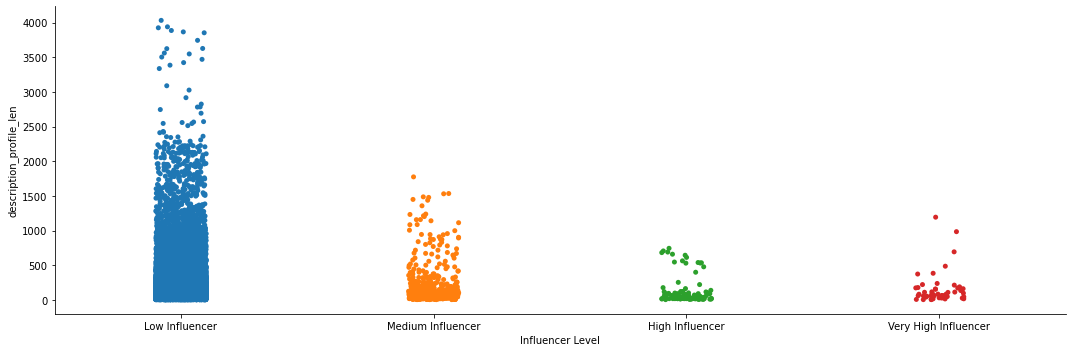

In [97]:
_ = sns.catplot(x="Influencer Level", y="description_profile_len", data=train, height=5, aspect=24/8)

In [98]:
train.shape

(16539, 27)

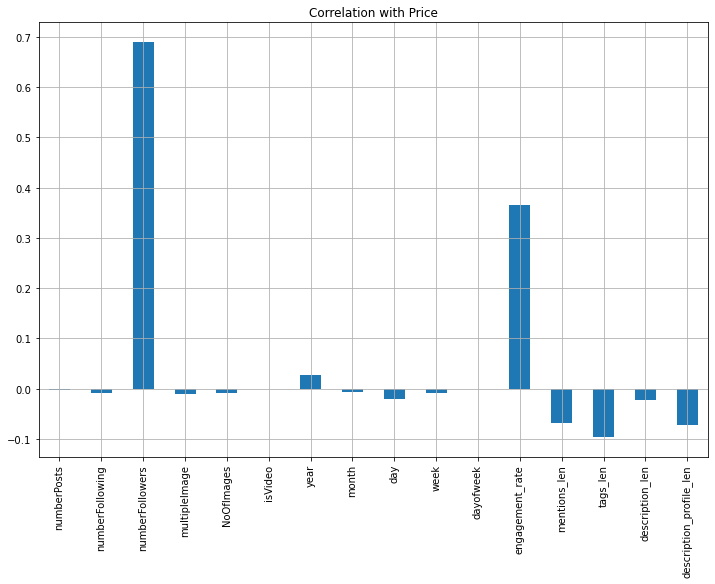

In [99]:
train.drop('numberLikes', axis=1).corrwith(train.numberLikes).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with Price")

# FEATURES

In [154]:
ID_COL, TARGET_COL = 'filename', 'numberLikes'

num_cols = ['numberPosts', 'numberFollowing', 'numberFollowers',
            'mentions_len','tags_len','description_len','description_profile_len',
           'year','month','day','week','dayofweek','engagement_rate']
cat_cols = ['isVideo', 'multipleImage','Influencer Level']
text_cols = ['username', 'descriptionProfile', 'alias', 'filename','mentions','localization','tags','description']
date_cols = ['Date','Time']

**Log transformed data**

Since the data is highly right skewed, we will take log to avoid biased result

In [144]:
train[num_cols + ['numberLikes']] = train[num_cols + ['numberLikes']].apply(lambda x: np.log1p(x))

train[num_cols].head()

numberPosts  numberFollowing  numberFollowers  mentions_len  tags_len  \
0     3.912023         2.397895        11.735797      2.708050  5.963579   
1     3.912023         2.397895        11.735797      2.890372  1.098612   
2     3.912023         2.397895        11.735797      2.639057  1.098612   
3     3.912023         2.397895        11.735797      2.708050  5.963579   
4     3.912023         2.397895        11.735797      2.639057  1.098612   

   description_len  description_profile_len      year     month       day  \
0         4.442651                 3.401197  7.609862  0.693147  1.791759   
1         4.442651                 3.401197  7.609862  1.609438  3.433987   
2         4.442651                 3.401197  7.609862  1.609438  3.433987   
3         4.442651                 3.401197  7.609862  1.609438  3.433987   
4         4.442651                 3.401197  7.609862  1.609438  3.433987   

       week  dayofweek  engagement_rate  
0  0.693147   1.386294         0.013512  
1  2.890372   1.945910         0.217743  
2  2.890372   1.945910         0.300474  
3  2.890372   1.945910         0.196932  
4  2.890372   1.945910         0.430321

**NLP on 'mentions'**

In [102]:
train.shape

(16539, 27)

In [24]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Anuvrat
[nltk_data]     Shukla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Anuvrat
[nltk_data]     Shukla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Anuvrat
[nltk_data]     Shukla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

ps = PorterStemmer()
wordnet=WordNetLemmatizer()

In [26]:
corpus = []
for i in range (0,len(train['tags'])):
    paragraph= train['tags'][i]
    
    sentences = nltk.sent_tokenize(paragraph)
    
    for i in range(len(sentences)):
        review = re.sub('[^a-zA-Z]', ' ', sentences[i])      #substituting everythig (apart from alphabets) with a ' ' 
        review = review.lower()                              # Lowering the cases
        review = review.split()                              #Converting into a list
        review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]  #Lemmetization
        review = ' '.join(review)                           # joining
        corpus.append(review)
        print(corpus)

['exclusivspezial']
['exclusivspezial', 'jumpsuit glam ootn']
['exclusivspezial', 'jumpsuit glam ootn', 'rehearsalday behindthescenes']
['exclusivspezial', 'jumpsuit glam ootn', 'rehearsalday behindthescenes', 'dress shoe glam']
['exclusivspezial', 'jumpsuit glam ootn', 'rehearsalday behindthescenes', 'dress shoe glam', 'weekend yay happyweekend kiss']
['exclusivspezial', 'jumpsuit glam ootn', 'rehearsalday behindthescenes', 'dress shoe glam', 'weekend yay happyweekend kiss', 'dress hair makeup glam letsdance liveshow funtimes ootn']
['exclusivspezial', 'jumpsuit glam ootn', 'rehearsalday behindthescenes', 'dress shoe glam', 'weekend yay happyweekend kiss', 'dress hair makeup glam letsdance liveshow funtimes ootn', 'danielhartwich showtime']
['exclusivspezial', 'jumpsuit glam ootn', 'rehearsalday behindthescenes', 'dress shoe glam', 'weekend yay happyweekend kiss', 'dress hair makeup glam letsdance liveshow funtimes ootn', 'danielhartwich showtime', '']
['exclusivspezial', 'jumpsuit gl

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['exclusivspezial', 'jumpsuit glam ootn', 'rehearsalday behindthescenes', 'dress shoe glam', 'weekend yay happyweekend kiss', 'dress hair makeup glam letsdance liveshow funtimes ootn', 'danielhartwich showtime', '', 'wewokeuplikethis teammeis letsdance breakfast cologne girl wirsinddiebademeister', 'happygirl', 'letsdance', 'familybrunch familybrunch eastersunday ostern pasen vrolijkpasen froheostern happyeaster', 'belated birthday dinner hamburg mybrother family love', 'blessed dresscode atouchofpink celebration whoopwhoop birthdaygirl party friend love', 'isaidyes engaged', 'isaidyes', 'styling glam live show cologne', '', 'legiony', '', '', '', '', '', '', '', '', '', '', '', '', '', 'bbtvarabi', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'sense frasi', 'sense frasi', 'sense frasi', 'sense frasi buonanotte', 'sense frasi', 'sense frasi', 'sense frasi', 'sense frasi buonanotte', 'sense frasi', 'sense frasi buonanotte', 'sense frasi', 'sense frasi', 'sens

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
Y = cv.fit_transform(corpus).toarray()

In [28]:
Y = pd.DataFrame(data=Y)

In [30]:
train= pd.concat([train,Y],axis=1)

In [31]:
train.shape

(16539, 11991)

**NLP on 'descriptionProfile'**

In [135]:
corpus = []
for i in range (0,len(train['description'])):
    paragraph= train['description'][i]
    
    sentences = nltk.sent_tokenize(paragraph)
    
    for i in range(len(sentences)):
        review = re.sub('[^a-zA-Z]', ' ', sentences[i])      #substituting everythig (apart from alphabets) with a ' ' 
        review = review.lower()                              # Lowering the cases
        review = review.split()                              #Converting into a list
        review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]  #Lemmetization
        review = ' '.join(review)                           # joining
        corpus.append(review)
        print(corpus)

['tv host let dance rtl germany sb philip sonicare deichmann sylvie mei shoecollection holiday ice believe owner mei enterprise']
['tv host let dance rtl germany sb philip sonicare deichmann sylvie mei shoecollection holiday ice believe owner mei enterprise', 'tv host let dance rtl germany sb philip sonicare deichmann sylvie mei shoecollection holiday ice believe owner mei enterprise']
['tv host let dance rtl germany sb philip sonicare deichmann sylvie mei shoecollection holiday ice believe owner mei enterprise', 'tv host let dance rtl germany sb philip sonicare deichmann sylvie mei shoecollection holiday ice believe owner mei enterprise', 'tv host let dance rtl germany sb philip sonicare deichmann sylvie mei shoecollection holiday ice believe owner mei enterprise']
['tv host let dance rtl germany sb philip sonicare deichmann sylvie mei shoecollection holiday ice believe owner mei enterprise', 'tv host let dance rtl germany sb philip sonicare deichmann sylvie mei shoecollection holiday

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['tv host let dance rtl germany sb philip sonicare deichmann sylvie mei shoecollection holiday ice believe owner mei enterprise', 'tv host let dance rtl germany sb philip sonicare deichmann sylvie mei shoecollection holiday ice believe owner mei enterprise', 'tv host let dance rtl germany sb philip sonicare deichmann sylvie mei shoecollection holiday ice believe owner mei enterprise', 'tv host let dance rtl germany sb philip sonicare deichmann sylvie mei shoecollection holiday ice believe owner mei enterprise', 'tv host let dance rtl germany sb philip sonicare deichmann sylvie mei shoecollection holiday ice believe owner mei enterprise', 'tv host let dance rtl germany sb philip sonicare deichmann sylvie mei shoecollection holiday ice believe owner mei enterprise', 'tv host let dance rtl germany sb philip sonicare deichmann sylvie mei shoecollection holiday ice believe owner mei enterprise', 'tv host let dance rtl germany sb philip sonicare deichmann sylvie mei shoecollection holiday ic

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()

In [137]:
X.shape

(24644, 3830)

In [138]:
X = pd.DataFrame(data=X)

In [139]:
train= pd.concat([train, X],axis=1)

### Helper functions for metrics

Multiplying metric with 1000 to easily compare the results of different models

In [155]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

def rmse(y_true,y_pred):                                             #returns  Log RMSE
    return np.sqrt(mean_squared_log_error(y_true,y_pred))

def metric(y_true,y_pred):                                           #returns Error X  1000 asked by competition 
    return 1000 * np.sqrt(mean_squared_error(y_true,y_pred))
    
target=train[TARGET_COL]

**Error multiplied with 1000** for better visibility

# # Baseline Model:  Predicting INstagram Likes as mean values

In [146]:
print(target.mean())

9.001619630953556


In [147]:
preds_target= pd.Series([target.mean()] * len(train))

In [148]:
#Predicted
preds_target.head(3)

0    9.00162
1    9.00162
2    9.00162
dtype: float64

In [149]:
#Actual
target.head(3)

0    2.890372
1    5.720312
2    6.084499
Name: numberLikes, dtype: float64

**Metrics**

In [150]:
error         = rmse(target,preds_target)
score_metric  = metric(target,preds_target)

score_metric, error

(1387.6093374115615, 0.14379925353936096)

**Root Mean Square Error** X 1000 = 1387.60

# Baseline Model2: Predicting using number of posts

Mean Likes per post

In [151]:
((train['numberLikes'] + 1)/(train['numberPosts'] + 1)).mean() 

1.2274703200286574

**Metrics**

In [152]:
preds_target=train['numberPosts'] * 1.227
metric_score=metric(target,preds_target)
error         = rmse(target,preds_target)
metric_score,error

(1850.092401878856, 0.19205714726364576)

**Root Mean Square Error** X 1000 = 1850.09

# **ML Models** - **IMPORT DATA AGAIN / MANIPULATE **

**Log transformed data**

In [156]:
train[num_cols + ['numberLikes']] = train[num_cols + ['numberLikes']].apply(lambda x: np.log1p(x))

In [157]:
train = pd.get_dummies(train, columns = cat_cols)

In [158]:
features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]
cat_num_cols = [c for c in features if c not in text_cols + date_cols]

len(features), len(cat_num_cols)

(29, 21)

**One Hot Encoding**

In [159]:
#train = pd.get_dummies(train, columns = cat_cols)

**Split the data set into train (80 %) and validation sets (20%)** 

In [160]:
trn, val = train_test_split(train, test_size=0.2, random_state = 1)

###### Input to our model will be the features
X_trn, X_val = trn[features], val[features]

###### Output of our model will be the TARGET_COL
y_trn, y_val = trn[TARGET_COL], val[TARGET_COL]

##### Features for the test data that we will be predicting
#X_test = test_proc[features]

**Fit a regression Model on train, check its results on validation set.**

In [161]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [162]:
def metric(y_true,y_pred):
    return 1000*np.sqrt(mean_squared_error(y_true,y_pred))

**Linear Regression** - Only NUMERICAL Features

In [163]:
clf = LinearRegression()
_=clf.fit(X_trn[num_cols],y_trn)

In [164]:
preds_val=clf.predict(X_val[num_cols])

In [165]:
#RESULT
metric(y_val,preds_val)

292.81246331742494

**Root Mean Square Error** X 1000 = 292.91--------------Good Improvement in prediction

In [166]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


**Linear Regression** - Categorical + Numerical Features

In [167]:
clf=LinearRegression()
_ = clf.fit(X_trn[cat_num_cols],y_trn)

In [168]:
preds_val=clf.predict(X_val[cat_num_cols])

In [169]:
#Result
metric(y_val,preds_val)

292.52451279047995

**Root Mean Square Error** X 1000 = 292.52-------Slightly better Improvement

#  Decision Tree Regressor - Hyper Parameter Tuning

In [170]:
from sklearn.model_selection import RandomizedSearchCV

In [171]:
params = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
}


In [172]:
clf = RandomizedSearchCV(DecisionTreeRegressor(),
                         params,
                         scoring='neg_root_mean_squared_error',
                         random_state=1,
                         n_iter=20)

In [173]:
search = clf.fit(train[cat_num_cols], train[TARGET_COL])
search.best_params_

{'min_samples_split': 30,
 'max_leaf_nodes': 128,
 'max_features': 0.8,
 'max_depth': 12}

In [174]:
best_params = {'min_samples_split': 30,
 'max_leaf_nodes': 128,
 'max_features': 0.8,
 'max_depth': 12}

clf = DecisionTreeRegressor(**best_params)

_ = clf.fit(X_trn[cat_num_cols], y_trn)

preds_val = clf.predict(X_val[cat_num_cols])

#RESULT
metric(y_val, preds_val)

198.50409820020437

**Root Mean Square Error** X 1000 = 198.50-----------Predictions Improved Further

# Validation Strategy

In [175]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [176]:
def run_clf_kfold(clf, train, test, features):

  N_SPLITS = 5         #Divide in 5 split (K)

  oofs = np.zeros(len(train))             #train prediction
  preds = np.zeros((len(test)))           #test prediction

  target = train[TARGET_COL]

  folds = StratifiedKFold(n_splits = N_SPLITS)
  stratified_target = pd.qcut(train[TARGET_COL], 10, labels = False, duplicates='drop') #splitting target in 10 parts 

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, stratified_target)):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ############# Get train, validation and test sets along with targets ################
  
    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]



    ############# Fitting and Predicting ################

    _ = clf.fit(X_trn, y_trn)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict(X_val)
    preds_test = clf.predict(X_test)

    fold_score = metric(y_val, preds_val)
    print(f'\nAV metric score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = metric(target, oofs)
  print(f'\n\nAV metric for oofs is {oofs_score}')

  return oofs, preds

**KFold on Decision Tree**

In [177]:
dt_params = {'min_samples_split': 30,
 'max_leaf_nodes': 32,
 'max_features': 0.8,
 'max_depth': 4}
clf = DecisionTreeRegressor(**dt_params)


In [178]:
dt_oofs, dt_preds = run_clf_kfold(clf, trn, val, cat_num_cols)


------------- Fold 1 -------------

AV metric score for validation set is 468.21464557347247

------------- Fold 2 -------------

AV metric score for validation set is 520.4635149490688

------------- Fold 3 -------------

AV metric score for validation set is 586.0711076256982

------------- Fold 4 -------------

AV metric score for validation set is 709.5404378937843

------------- Fold 5 -------------

AV metric score for validation set is 532.4834605131592


AV metric for oofs is 569.3036446076267


**Root Mean Square Error** X 1000 = 569.303 ------------Error increased; Poor model compared to earlier models

# **Gradient Boosting**

## **LightGBM**

In [179]:
from lightgbm import LGBMRegressor

In [180]:
clf = LGBMRegressor()
lgb_oofs, lgb_preds = run_clf_kfold(clf, trn, val, cat_num_cols)


------------- Fold 1 -------------

AV metric score for validation set is 56.58595097448306

------------- Fold 2 -------------

AV metric score for validation set is 77.54937168539834

------------- Fold 3 -------------

AV metric score for validation set is 160.57620100643183

------------- Fold 4 -------------

AV metric score for validation set is 123.66180789456055

------------- Fold 5 -------------

AV metric score for validation set is 63.97049624570715


AV metric for oofs is 104.29013179256704


**Root Mean Square Error** X 1000 = 104.197----------Good improvement with LGBM model

### **Tuning LightGBM**

Lets do , Early Stopping: Stopping the model training, when the model starts to overfit
  
* HyperParameter Optimization.
 

**Simple Function to Run Gradient Boosting**

In [181]:
def run_gradient_boosting(clf, fit_params, train, test, features):
  N_SPLITS = 5
  oofs = np.zeros(len(train))
  preds = np.zeros((len(test)))

  target = train[TARGET_COL]

  folds = StratifiedKFold(n_splits = N_SPLITS)
  stratified_target = pd.qcut(train[TARGET_COL], 10, labels = False, duplicates='drop')

  feature_importances = pd.DataFrame()

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, stratified_target)):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]
 
    _ = clf.fit(X_trn, y_trn, eval_set = [(X_val, y_val)], **fit_params)

    fold_importance = pd.DataFrame({'fold': fold_ + 1, 'feature': features, 'importance': clf.feature_importances_})
    feature_importances = pd.concat([feature_importances, fold_importance], axis=0)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict(X_val)
    preds_test = clf.predict(X_test)

    fold_score = metric(y_val, preds_val)
    print(f'\nAV metric score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = metric(target, oofs)
  print(f'\n\nAV metric for oofs is {oofs_score}')

  feature_importances = feature_importances.reset_index(drop = True)
  fi = feature_importances.groupby('feature')['importance'].mean().sort_values(ascending = False)[:20][::-1]
  fi.plot(kind = 'barh', figsize=(12, 6))

  return oofs, preds, fi

**Manual Tuning. Choosing Hyperparameters to Tune**


------------- Fold 1 -------------
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.0822179
[200]	valid_0's rmse: 0.0677822
[300]	valid_0's rmse: 0.0630548
[400]	valid_0's rmse: 0.059001
[500]	valid_0's rmse: 0.0575377
[600]	valid_0's rmse: 0.0560341
[700]	valid_0's rmse: 0.0549244
[800]	valid_0's rmse: 0.0542184
[900]	valid_0's rmse: 0.0536223
[1000]	valid_0's rmse: 0.0532378
Did not meet early stopping. Best iteration is:
[957]	valid_0's rmse: 0.0531562

AV metric score for validation set is 53.15620430776769

------------- Fold 2 -------------
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.0919801
[200]	valid_0's rmse: 0.0790368
[300]	valid_0's rmse: 0.0767134
[400]	valid_0's rmse: 0.0742001
[500]	valid_0's rmse: 0.0730257
[600]	valid_0's rmse: 0.0722425
[700]	valid_0's rmse: 0.0711891
[800]	valid_0's rmse: 0.0705945
[900]	valid_0's rmse: 0.0697769
[1000]	valid_0's rmse: 0.0689161
Did not meet early stoppin

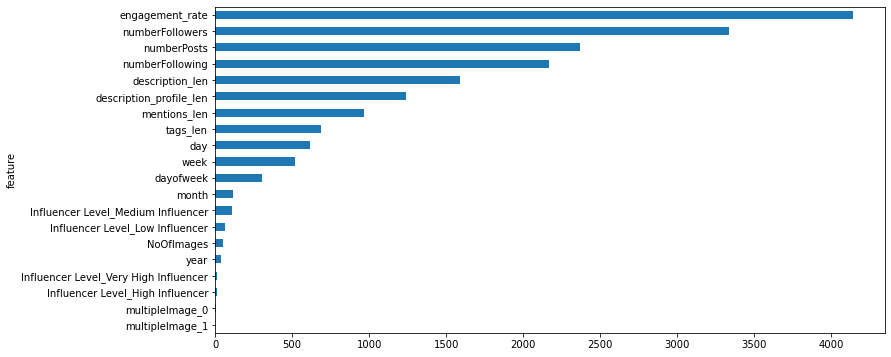

In [182]:
clf = LGBMRegressor(n_estimators = 1000,
                        learning_rate = 0.05,
                        colsample_bytree = 0.76,
                        metric = 'None',
                        )
fit_params = {'verbose': 100, 'early_stopping_rounds': 100, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, trn, val, cat_num_cols)

**Root Mean Square Error** X 1000 = 104.55-------Good model with low error

As evident from the graph of **decreasing order of importance of features**, Engagement Rate, number of followers,and number of posts, number of following

**Tuning Learning Rate**


------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.163401
[600]	valid_0's rmse: 0.0710357
[900]	valid_0's rmse: 0.0654114
[1200]	valid_0's rmse: 0.0627492
[1500]	valid_0's rmse: 0.0611673
[1800]	valid_0's rmse: 0.0600553
[2100]	valid_0's rmse: 0.0593457
[2400]	valid_0's rmse: 0.0588899
[2700]	valid_0's rmse: 0.0587823
[3000]	valid_0's rmse: 0.0585391
[3300]	valid_0's rmse: 0.05834
[3600]	valid_0's rmse: 0.0580182
[3900]	valid_0's rmse: 0.0575523
[4200]	valid_0's rmse: 0.0570783
[4500]	valid_0's rmse: 0.0567132
[4800]	valid_0's rmse: 0.056201
Did not meet early stopping. Best iteration is:
[5000]	valid_0's rmse: 0.0558678

AV metric score for validation set is 55.867829876343436

------------- Fold 2 -------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.161439
[600]	valid_0's rmse: 0.0796196
[900]	valid_0's rmse: 0.0749165
[1200]	valid_0's rmse: 0.0726754
[1500]	valid_0's

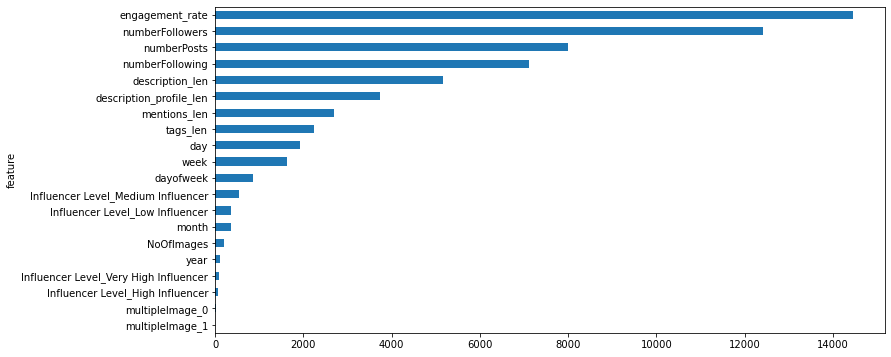

In [183]:
clf = LGBMRegressor(n_estimators = 5000,
                        learning_rate = 0.01,
                        colsample_bytree = 0.76,
                        metric = 'None',
                        )
fit_params = {'verbose': 300, 'early_stopping_rounds': 200, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, trn, val, cat_num_cols)

**Root Mean Square Error** X 1000 = 105.06-------Good model with low error



## **CatBoost**


------------- Fold 1 -------------
0:	learn: 1.3740197	test: 1.3931044	best: 1.3931044 (0)	total: 152ms	remaining: 7m 34s
200:	learn: 0.3912456	test: 0.3783061	best: 0.3783061 (200)	total: 1.42s	remaining: 19.8s
400:	learn: 0.1682617	test: 0.1418926	best: 0.1418926 (400)	total: 2.46s	remaining: 15.9s
600:	learn: 0.1080330	test: 0.0870450	best: 0.0870450 (600)	total: 3.83s	remaining: 15.3s
800:	learn: 0.0829058	test: 0.0693259	best: 0.0693259 (800)	total: 5.29s	remaining: 14.5s
1000:	learn: 0.0675584	test: 0.0611914	best: 0.0611914 (1000)	total: 6.5s	remaining: 13s
1200:	learn: 0.0557463	test: 0.0570424	best: 0.0570424 (1200)	total: 7.68s	remaining: 11.5s
1400:	learn: 0.0474759	test: 0.0542397	best: 0.0542397 (1400)	total: 9.84s	remaining: 11.2s
1600:	learn: 0.0421501	test: 0.0530970	best: 0.0530970 (1600)	total: 12.6s	remaining: 11s
1800:	learn: 0.0382724	test: 0.0526857	best: 0.0526557 (1784)	total: 15s	remaining: 9.96s
2000:	learn: 0.0354562	test: 0.0527769	best: 0.0525998 (1831)	to

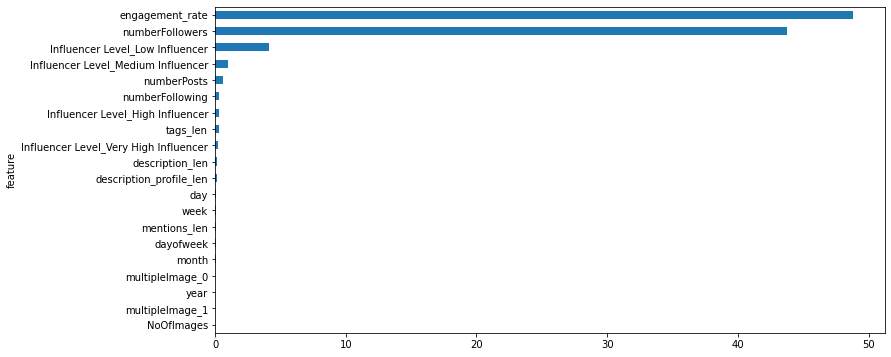

In [184]:
clf = CatBoostRegressor(n_estimators = 3000,
                       learning_rate = 0.01,
                       rsm = 0.4, ## Analogous to colsample_bytree
                       random_state=2054,
                       )

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

cb_oofs, cb_preds, fi = run_gradient_boosting(clf, fit_params, trn, val, cat_num_cols)

**Root Mean Square Error** X 1000 = 108.97-------Good model with low error



## XGBoost


------------- Fold 1 -------------
[1]	validation_0-rmse:7.79292
[2]	validation_0-rmse:7.40890
[3]	validation_0-rmse:7.04084
[4]	validation_0-rmse:6.69073
[5]	validation_0-rmse:6.36177
[6]	validation_0-rmse:6.04833
[7]	validation_0-rmse:5.75462
[8]	validation_0-rmse:5.47301
[9]	validation_0-rmse:5.20102
[10]	validation_0-rmse:4.94272
[11]	validation_0-rmse:4.70426
[12]	validation_0-rmse:4.47452
[13]	validation_0-rmse:4.25536
[14]	validation_0-rmse:4.05098
[15]	validation_0-rmse:3.85302
[16]	validation_0-rmse:3.66981
[17]	validation_0-rmse:3.49155
[18]	validation_0-rmse:3.32634
[19]	validation_0-rmse:3.16516
[20]	validation_0-rmse:3.01284
[21]	validation_0-rmse:2.86857
[22]	validation_0-rmse:2.73079
[23]	validation_0-rmse:2.59538
[24]	validation_0-rmse:2.47460
[25]	validation_0-rmse:2.35194
[26]	validation_0-rmse:2.24034
[27]	validation_0-rmse:2.12949
[28]	validation_0-rmse:2.02728
[29]	validation_0-rmse:1.93492
[30]	validation_0-rmse:1.84688
[31]	validation_0-rmse:1.75559
[32]	validat

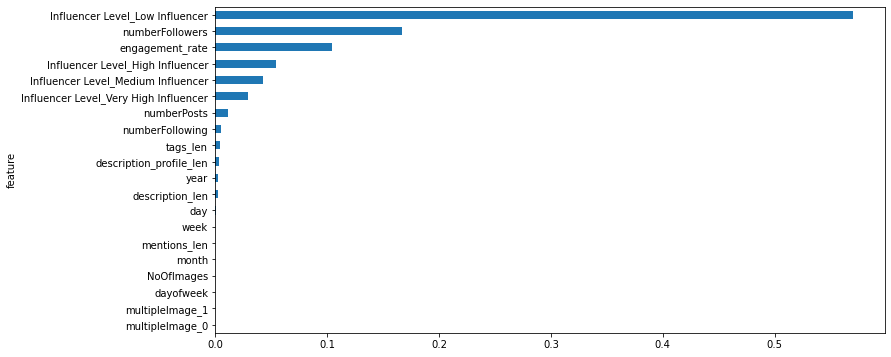

In [185]:
clf = XGBRegressor(n_estimators = 1000,
                    max_depth = 6,
                    learning_rate = 0.05,
                    colsample_bytree = 0.5,
                    random_state=1452,
                    )

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

xgb_oofs, xgb_preds, fi = run_gradient_boosting(clf, fit_params, trn, val, cat_num_cols)

**Root Mean Square Error** X 1000 = 60.21-------**Best model with least error**



# **TEAM D-TALE**
**SYMBIOSIS INSTITUTE OF OPERATIONS MANAGEMENT NASHIK**